In [7]:
pwd

'd:\\Project analyst\\anb data'

In [8]:
#import các thư viện sử dụng để phân tích dữ liệu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns 

In [9]:
airbnb = pd.read_csv(r"D:\Project analyst\anb data\AB_NYC_2019.csv")
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
#check dạng dữ liệu của các cột
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [11]:
#check dữ liệu có tổng bao nhiêu row để hiểu thêm về độ lớn của dataset
len(airbnb)

48895

In [12]:

##Kết luận: dataset có tổng 16 cột và chứa rất nhiều dữ liệu có giá trị. Bên cạnh đó, ta vẫn nhận ra có nhứng giá trị bị mất (missing values) cần được cleaning.

In [13]:
### UNDERSTANDING, WRANGLING AND CLEANING DATA ###

In [14]:
#Sau khi load data, ta thấy một vài chỗ có giá trị NaN, vì vậy cần phải đánh giá kiểm tra lại các giá trị này trước khi phân tích các dữ liệu.
#Đầu tiên, tìm các cột nào chứa nhiều giá trị NaN nhiều nhất bằng function isnull().sum()

airbnb.isnull().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
##Nhận xét: 
#"last_review" và "review_per_month" có nhiều null nhất nhưng hoàn toàn hợp lí vì không phải ai thuê phòng đều viết review, cho nên sẽ có những ngày mà phòng được thuê không nhận review.
#Do đó không cần xử lí giá trị null ở 2 cột này.
#Cột "Name" và "Host_name" chỉ là những cái tên và loại dữ liệu này cũng không ảnh hưởng nhiều đến quá trình phân tích dữ liệu. 
#Do đó không cần xử lí giá trị null ở 2 cột này.

#Tiếp theo, chúng ta sẽ xử lí giá trị missing và xóa những cột,dữ liệu không cần thiết.)

In [17]:
#Loại bỏ các cột dữ liệu không quan trọng

airbnb.drop(['id','host_name','last_review'],axis=1,inplace=True)
airbnb.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [23]:
#Thay thế tất cả giá trị NaN ở cột 'review_per_month' bằng 0
airbnb.fillna({'reviews_per_month':0},inplace=True)
#Kiêm tra xem còn bao nhiêu giá trị Null
airbnb.reviews_per_month.isnull().sum()

0

In [25]:
#Kiêm tra các Unique Values
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [26]:
len(airbnb.neighbourhood.unique())

221

In [27]:
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [28]:
### PHÂN TÍCH VÀ VISUALIZE DỮ LIỆU ###

In [29]:
#Top10 các Host(id) được ghi nhận nhiều nhất
top_host = airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [31]:
top_host_max = airbnb.calculated_host_listings_count.max()
top_host_max

327

In [32]:
#cài đặt setting để chuẩn bị visualize
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [34]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID','host_id':'P_count'}, inplace=True)
top_host_df

,Host_ID,P_count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

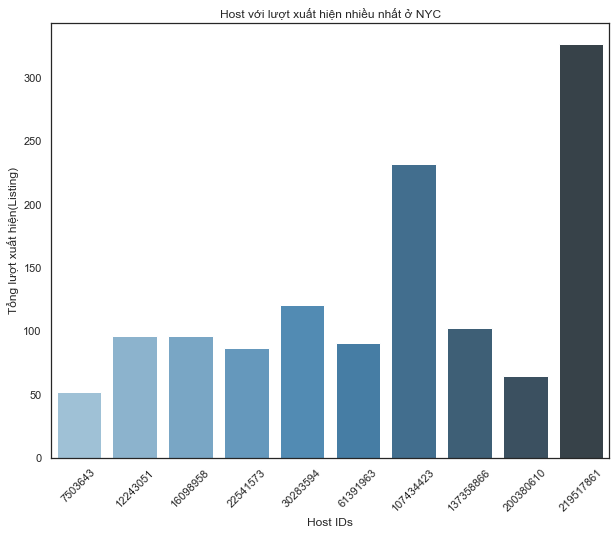

In [44]:
viz_1=sns.barplot(x="Host_ID", y="P_count", data=top_host_df, palette='Blues_d')
viz_1.set_title('Host với lượt xuất hiện nhiều nhất ở NYC')
viz_1.set_ylabel('Tổng lượt xuất hiện(Listing)')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)



In [48]:
#Lượt booking theo khu vực
top_location = airbnb.neighbourhood_group.value_counts()
top_location

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [58]:
top_location_df=pd.DataFrame(top_location)
top_location_df.reset_index(inplace=True)
top_location_df.rename(columns={'index':'Location','neighbourhood_group':'numbers of booking'}, inplace=True)
top_location_df

,Location,numbers of booking
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


Text(0.5, 1.0, 'Khu vực có số booking cao nhất')

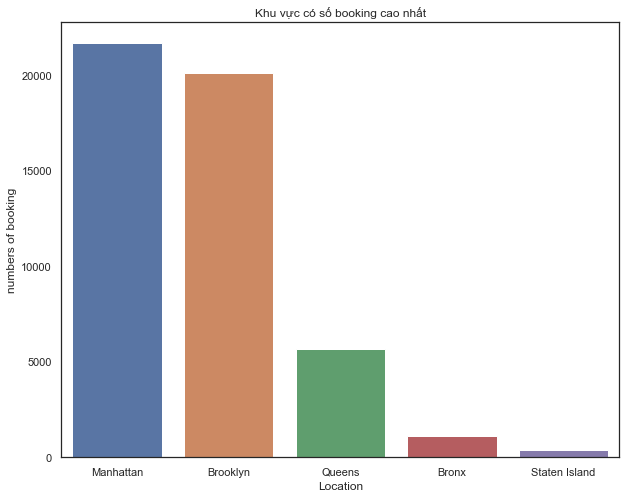

In [66]:
viz_2= sns.barplot(x='Location',y='numbers of booking',data=top_location_df)
viz_2.set_title('Khu vực có số booking cao nhất')


In [67]:
#Top 10 các phòng được thích nhất dựa trên lượt review
top_review=airbnb.nlargest(10,'number_of_reviews')
top_review

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [72]:
gia_thue_trungbinh_1dem=top_review.price.mean()
print('gia thue trungbinh 1dem: {}'.format(gia_thue_trungbinh_1dem))

gia thue trungbinh 1dem: 65.4
